In [97]:
#What is the most popular car listing on this platform?

# 2021 HYUNDAI KONA SEL PLUS
# OR
# 2018 FORD F-150 XL

In [41]:
!pip install sqlalchemy
!pip install matplotlib
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("car_sales.db")

df = pd.read_csv("Online_Cars_Sale_Marketplace_Data.csv")
df.to_sql("car_sales", conn, if_exists="replace", index=False)

9379

In [47]:
#Based on highest Consumer Rating > Consumer Reviews > Total Listings
q1 = """
SELECT Year, 
Make, 
Model, 
AVG(ConsumerRating) AS ConsumerRating, 
ConsumerReviews, 
SellerRating, 
COUNT(Model) AS total_listings
FROM car_sales
GROUP BY Model
ORDER BY ConsumerRating DESC, ConsumerReviews DESC, total_listings ASC
LIMIT 20
;
"""

pd.read_sql(q1,conn)

,Year,Make,Model,ConsumerRating,ConsumerReviews,SellerRating,total_listings
0,2021,Hyundai,Kona SEL Plus,5.0,48,4.8,1
1,2021,Honda,Accord Sport 2.0T,5.0,36,4.0,2
2,2018,Cadillac,Escalade ESV Luxury,5.0,11,4.8,6
3,2020,Mercedes-Benz,E-Class E 450 4MATIC,5.0,10,4.8,1
4,2019,Mercedes-Benz,GLS 450 4MATIC,5.0,10,4.6,2
5,2019,Mercedes-Benz,AMG GLE 43 4MATIC Coupe,5.0,10,4.5,21
6,2020,Cadillac,Escalade Platinum,5.0,9,4.5,3
7,2016,INFINITI,Q70 3.7X,5.0,8,4.7,1
8,2020,GMC,Sierra 3500 Denali,5.0,8,4.4,1
9,2021,Audi,Q3 45 S line Premium,5.0,8,4.6,16


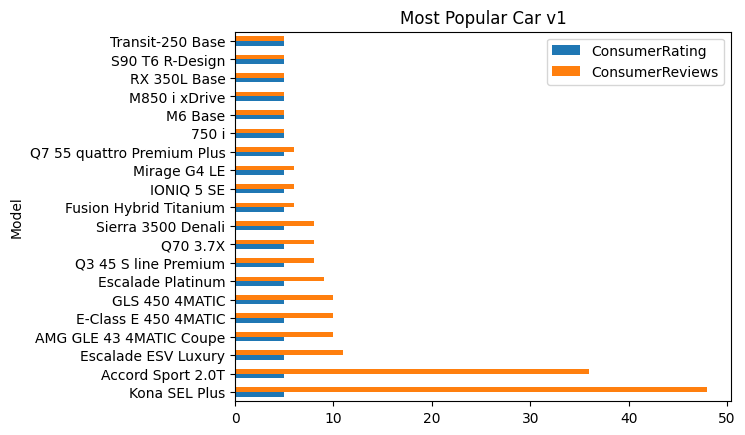

In [54]:
from sqlalchemy import create_engine

query = """
SELECT Model,
AVG(ConsumerRating) AS ConsumerRating, 
ConsumerReviews
FROM car_sales
GROUP BY Model
ORDER BY ConsumerRating DESC, ConsumerReviews DESC
LIMIT 20
"""

df2 = pd.read_sql(query,conn)
plot = df2.plot.barh(title="Most Popular Car v1", x="Model");


In [53]:
#Based on highest Consumer Review > Consumer Rating > Total Listings
q2 = """
SELECT Year, 
Make, 
Model, 
CAST(AVG(ConsumerRating) AS DECIMAL (10,2)) AS ConsumerRating, 
ConsumerReviews, 
SellerRating, 
COUNT(*) AS total_listings
FROM car_sales
GROUP BY Model
ORDER BY ConsumerReviews DESC, ConsumerRating DESC, total_listings ASC
LIMIT 20
;
"""

pd.read_sql(q2,conn)

,Year,Make,Model,ConsumerRating,ConsumerReviews,SellerRating,total_listings
0,2018,Ford,F-150 XL,4.800000,817,4.4,7
1,2018,Ford,F-150 Lariat,4.785714,817,4.8,56
2,2017,Honda,CR-V Touring,4.761905,803,4.7,21
3,2018,Toyota,Camry XLE,4.750000,781,4.2,2
4,2018,Toyota,RAV4 XLE,4.750704,770,3.3,71
5,2018,Toyota,RAV4 Limited,4.709677,770,4.7,31
6,2017,Honda,Civic EX,4.800000,743,4.2,11
7,2018,Honda,Accord Touring 2.0T,4.933333,652,4.6,3
8,2018,Honda,Accord EX-L 2.0T,4.800000,652,4.7,3
9,2018,Honda,Accord EX,4.766667,652,4.9,3


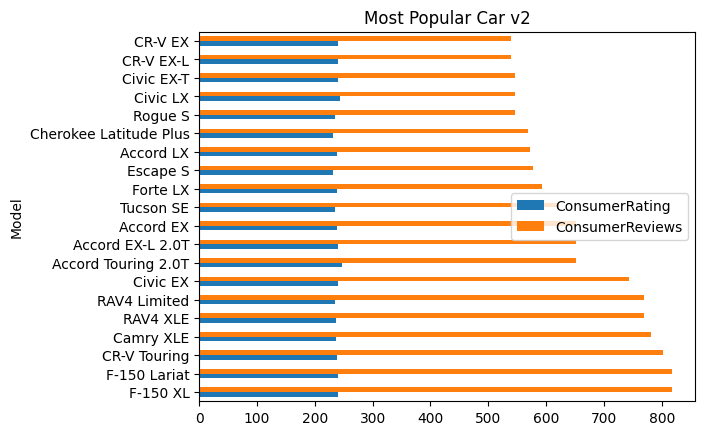

In [56]:
from sqlalchemy import create_engine

query2 = """
SELECT Model,
AVG(ConsumerRating)*50 AS ConsumerRating, 
ConsumerReviews
FROM car_sales
GROUP BY Model
ORDER BY ConsumerReviews DESC, ConsumerRating DESC
LIMIT 20
"""

df2 = pd.read_sql(query2,conn)
plot = df2.plot.barh(title="Most Popular Car v2", x="Model");

In [96]:
#Define what is a popular car listing?

# - HIGHEST CONSUMER RATING: This would identify the car listing that has the highest average rating from consumers,
#   and would be a good metric for identifying the car that is the most highly-regarded by buyers.

# - HIGHEST CONSUMER REVIEW + CONSUMER RATING: This would identify the car listing that has the most reviews from consumers,
#   and would be a good metric for identifying the car that has generated the most interest or engagement from buyers.

# - TOTAL CAR LISTINGS: This would identify the number of cars available for sale by the marketplace,
#   and would be a good metric for identifying how in-demand a car is. The more cars available, the least in-demand it may be.

# - COUPLING METRICS: This would be a more precise identifier to pinpointing which car is most popular, 
#   depending on the defintion we choose.
 

In [64]:
#How to uniquely define a type of car? By country made, brand year, etc (1).
q3 = """
SELECT DISTINCT(model), Make
FROM car_sales
ORDER BY Make, Model
;
"""

pd.read_sql(q3,conn)

,Model,Make
0,ILX,Acura
1,ILX Premium & A-SPEC Packages,Acura
2,ILX Premium Package,Acura
3,ILX w/AcuraWatch Plus,Acura
4,ILX w/Premium Pkg,Acura
...,...,...
1299,XC90 T6 Inscription 6 Passenger,Volvo
1300,XC90 T6 Inscription 7 Passenger,Volvo
1301,XC90 T6 Momentum,Volvo
1302,XC90 T6 Momentum 7 Passenger,Volvo


In [65]:
#How to uniquely define a type of car? By country made, brand year, etc (2).
q4 = """
SELECT make, model
FROM car_sales
GROUP BY model
ORDER BY Make, Model
;
"""
pd.read_sql(q4,conn)

,Make,Model
0,Acura,ILX
1,Acura,ILX Premium & A-SPEC Packages
2,Acura,ILX Premium Package
3,Acura,ILX w/AcuraWatch Plus
4,Acura,ILX w/Premium Pkg
...,...,...
1299,Volvo,XC90 T6 Inscription 6 Passenger
1300,Volvo,XC90 T6 Inscription 7 Passenger
1301,Volvo,XC90 T6 Momentum
1302,Volvo,XC90 T6 Momentum 7 Passenger
